# Problem Statement
 * Predict whether income of individual exceeds $50K/year or not based on attributes given.

# Description
* as the problem of enequality of income has become very prominent over the years, governments of different countrieshave been trying to address the problem so as to improve the economic stability of a nation.
* In this study, Machine Learning classification techniques is used in order to predict whether person's yearly income falls in the income catagory of either greater thn 50k dollars or less than equal to 50k dollars category based on a certain set of attributes. An analysis of this kind helps to figure out which individual attributes are necessary in improving an individual's income so that focus can be put on those specific factors so as to level up the income of individuals.

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Data Ingestion

In [99]:
df=pd.read_csv('adult.csv')

In [100]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [101]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [102]:
df.shape

(32561, 15)

In [103]:
df.size

488415

In [104]:
df.drop(['relationship'],axis=1,inplace=True)

In [105]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [106]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

# replace Special symbol with np.nan

In [107]:
df=df.replace('?',np.nan)

In [108]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [109]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [110]:
df['workclass']=df['workclass'].fillna('Private')

In [111]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [112]:
df['occupation']=df['occupation'].fillna('Other-service')

In [113]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [114]:
df['native.country']=df['native.country'].fillna('United-States')

In [115]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

# Check how many class in income feature.

In [116]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

# Convert classes in income feature to 0 and 1

In [117]:
df['income']=df['income'].replace({'<=50K':0,'>50K':1})

In [118]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Other-service,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Other-service,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,White,Female,0,3900,40,United-States,0


In [119]:
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [120]:
educational_df=pd.DataFrame({'education':df['education'].unique(),'education_no':df['education.num'].unique()})

In [121]:
educational_df.sort_values('education_no',ascending=True)

,education,education_no
15,Preschool,1
11,1st-4th,2
12,5th-6th,3
2,7th-8th,4
14,9th,5
3,10th,6
8,11th,7
13,12th,8
0,HS-grad,9
1,Some-college,10


In [122]:
df1=df.drop(['education'],axis=1)

In [123]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


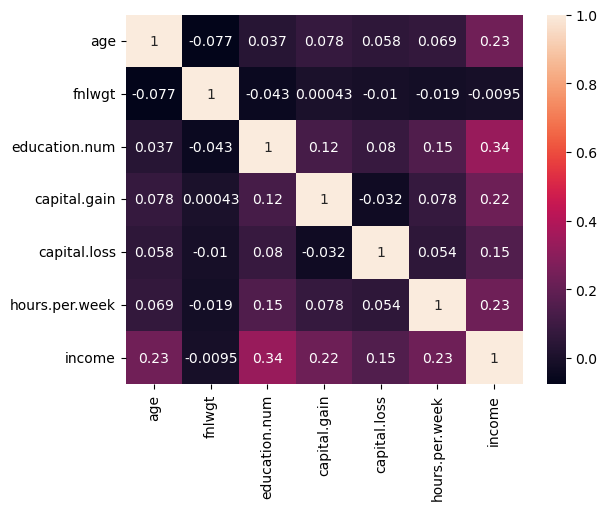

In [124]:
import seaborn as sns
sns.heatmap(df.corr(),annot = True);

In [125]:
# hence from corrleation we can drop fnlwgt

In [126]:
df.drop(['fnlwgt'],axis=1,inplace=True)

In [127]:
df1['education.num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64

In [128]:
df1=df.drop(['income'],axis=1)

In [129]:
# ho= there is no relation between given feature with dependent variable
# ha= there is relation between given feature with dependent variable

In [130]:
# df.drop(['capital.gain','capital.loss'],axis=1,inplace='True')

In [131]:
import matplotlib.pyplot as plt

In [132]:
import seaborn as sns

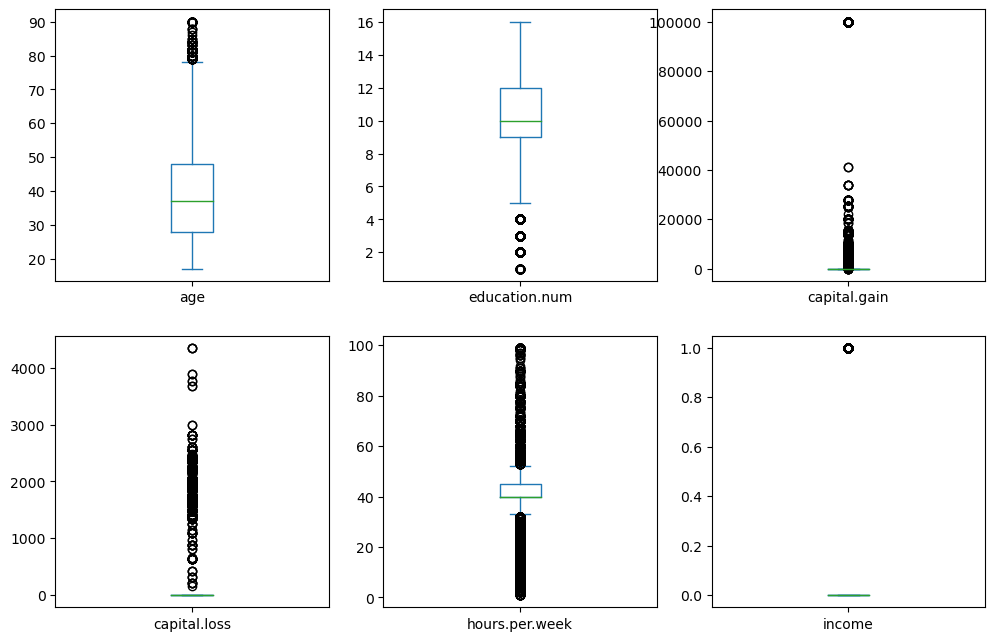

In [133]:
df.plot(kind='box',figsize=(12,12), layout=(3,3),subplots=True);

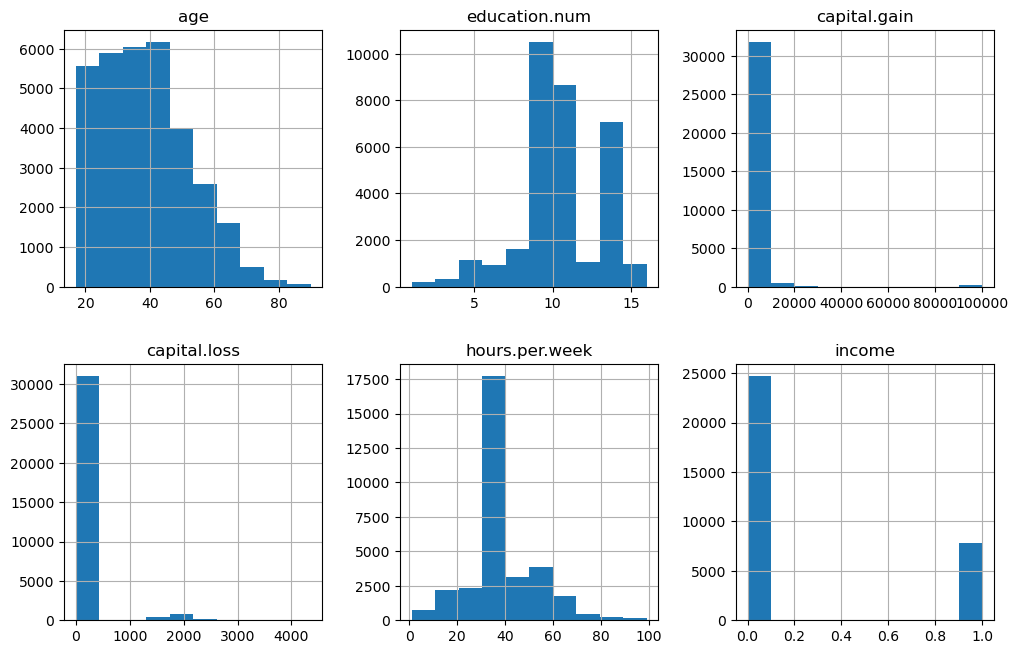

In [134]:
df.hist(figsize=(12,12),layout=(3,3),sharex=False);

In [135]:
df1['capital.gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
4931         1
7978         1
5060         1
2538         1
Name: capital.gain, Length: 119, dtype: int64

In [136]:
df1=df.drop(['income'],axis=1)

In [137]:
cols_list=['age','capital.gain','capital.loss','hours.per.week']

In [138]:
for cols in df1.columns:
    if df1[cols].dtype!='object' and cols in cols_list:
        q1=df1[cols].quantile(0.25)
        q3=df1[cols].quantile(0.75)
        q2=q3-q1
        low=q1-(1.5*q2)
        high=q3+(1.5*q2)
        (df1.loc[(df1[cols]<low) | (df1[cols]>high),cols])=df1[cols].median()

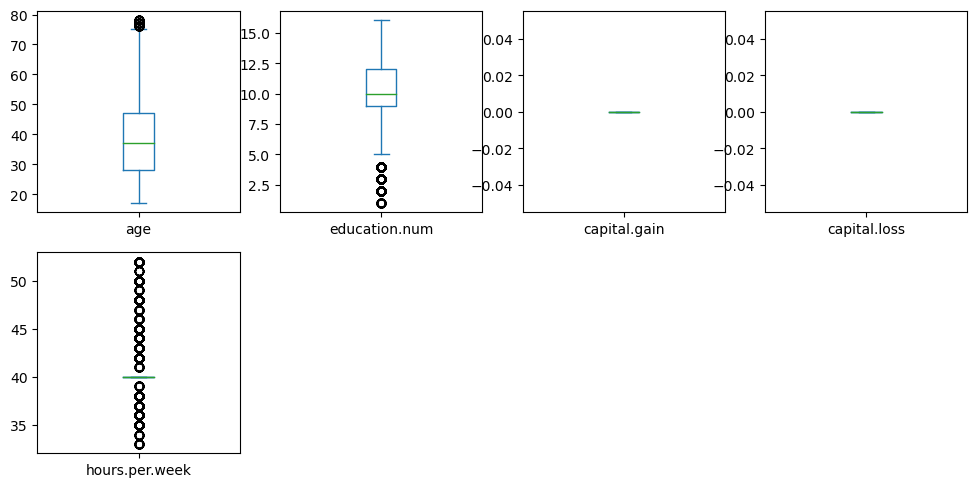

In [139]:
df1.plot(kind='box',figsize=(12,12), layout=(4,4),subplots=True);

In [140]:
# ho= there is no relation between given feature with dependent variable
# ha= there is relation between given feature with dependent variable

In [141]:
for cols in df1.columns:
    from scipy.stats import chi2_contingency
    chi_df=pd.crosstab(df1[cols],df['income'])
    a,p_value,b,c=chi2_contingency(chi_df)
    if p_value > 0.05:
        print(f'{cols} has p_value of {p_value}')

capital.gain has p_value of 1.0
capital.loss has p_value of 1.0


In [142]:
df1.drop(['capital.gain','capital.loss'],axis=1,inplace=True)

In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
le=LabelEncoder()

In [145]:
for cols in df1.columns:
    if df1[cols].dtype=='object':
        df1[cols]=le.fit_transform(df1[cols])

# Data Standardization

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
std=StandardScaler()

In [148]:
std_df=std.fit_transform(df1)

In [149]:
std_df=pd.DataFrame(std_df)

In [150]:
std_df.columns=df1.iloc[:,:].columns

In [151]:
a=list(df['education'].unique())

In [152]:
b=df['education'].value_counts()

In [153]:
c=[]
for i in b:
    c.append(i)

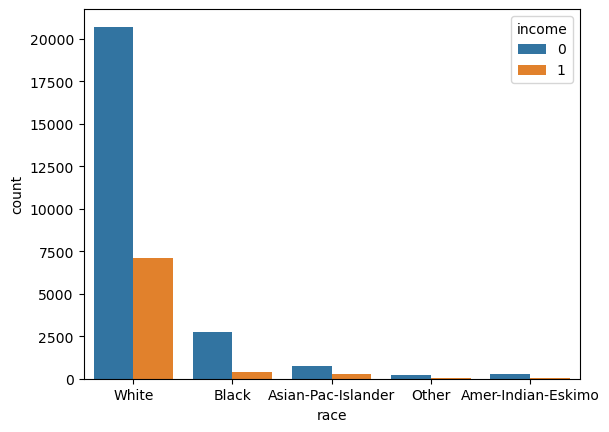

In [154]:
sns.countplot(df['race'], hue='income', data=df,);

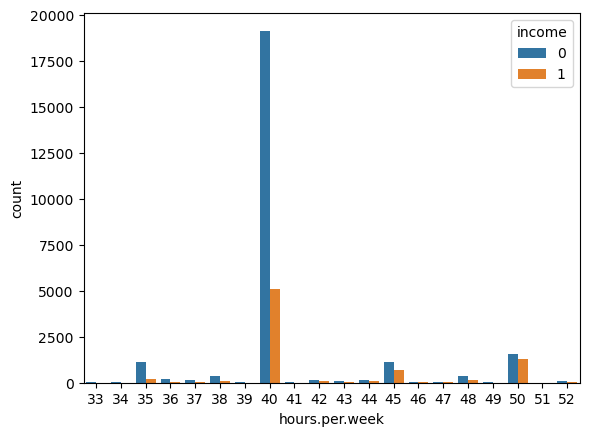

In [155]:
a=sns.countplot(df1['hours.per.week'], hue='income', data=df);


(array([   67.,  1517.,   625., 24263.,   255.,   363.,  1906.,   566.,
         2848.,   151.]),
 array([33. , 34.9, 36.8, 38.7, 40.6, 42.5, 44.4, 46.3, 48.2, 50.1, 52. ]),
 <BarContainer object of 10 artists>)

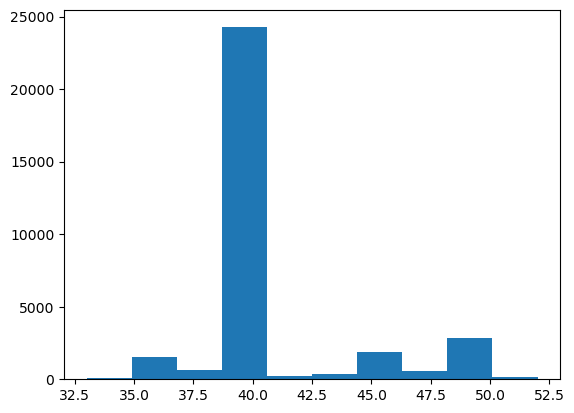

In [156]:
plt.hist(df1['hours.per.week'])

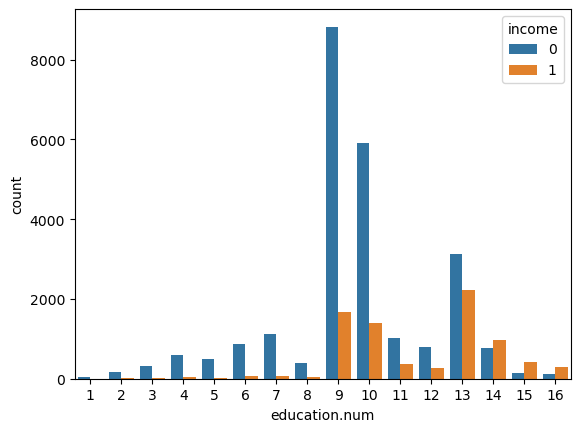

In [157]:
sns.countplot(df1['education.num'], hue='income', data=df);

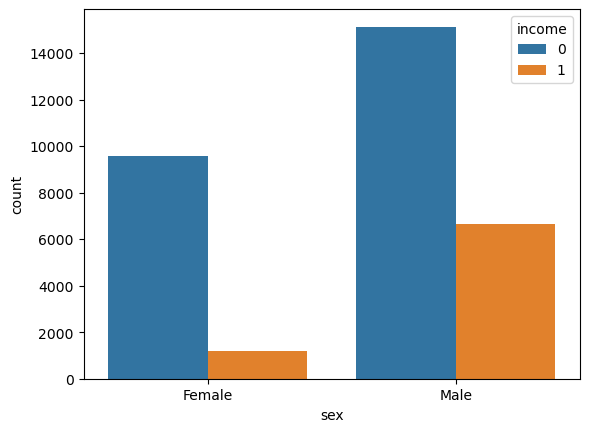

In [158]:
import seaborn as sns
ax = sns.countplot(x="sex", hue='income', data=df)

In [159]:
final_df=pd.concat([std_df,df['income']],axis=1)

# split data into train and test

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_stratified = final_df.iloc[:,:-1]
y_stratified = final_df.iloc[:,[-1]]

In [162]:
X_train,X_test,y_train,y_test=train_test_split(X_stratified,y_stratified,train_size=0.8,stratify=y_stratified,random_state=0)

In [163]:
#train_df,test_df=train_test_split(final_df,train_size=0.8)

In [164]:
#a=train_df[train_df['income']==1]

In [165]:
a

<AxesSubplot:xlabel='hours.per.week', ylabel='count'>

In [166]:
#train_df=pd.concat([train_df,a,a])

In [167]:
#train_df['income'].value_counts()

In [168]:
#x_train=train_df.iloc[:,:-1]
#y_train=train_df.iloc[:,[-1]]
#x_test=test_df.iloc[:,:-1]
#y_test=test_df.iloc[:,[-1]]

In [169]:
y_train.income.value_counts()

0    19775
1     6273
Name: income, dtype: int64

In [170]:
19775/6273

3.152399171050534

In [171]:
y_test['income'].value_counts()

0    4945
1    1568
Name: income, dtype: int64

In [172]:
4945/1568

3.153698979591837

### here we have succesfully applied stratified sampling 

In [173]:
y_train=np.ravel(y_train,order='C')

In [373]:
# defining list for appending results
result = []

### logistic regression

In [174]:
from sklearn.linear_model import LogisticRegression

In [175]:
lr=LogisticRegression(random_state=42)

In [176]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [177]:
y_test_pred=lr.predict(X_test)

In [178]:
from sklearn.metrics import confusion_matrix

In [179]:
confusion_matrix(y_test,y_test_pred)

array([[4616,  329],
       [ 945,  623]], dtype=int64)

In [180]:
from sklearn import metrics

In [181]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [182]:
from sklearn import metrics
# accuracy measures by classification report
result = metrics.classification_report(y_test,y_test_pred)
# print the result
print(result)

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4945
           1       0.65      0.40      0.49      1568

    accuracy                           0.80      6513
   macro avg       0.74      0.67      0.69      6513
weighted avg       0.79      0.80      0.79      6513



### hyperparamer tunning in logistic regression

In [183]:
lr_grid={'solver' :['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'penalty':['elasticnet', 'l1', 'l2']}

In [184]:
from sklearn.model_selection import GridSearchCV

In [185]:
grid_lr=GridSearchCV(lr,lr_grid)

In [186]:
grid_lr.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'penalty': ['elasticnet', 'l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [187]:
grid_lr.best_params_

{'penalty': 'l2', 'solver': 'newton-cg'}

In [188]:
LR=LogisticRegression(penalty='l2',solver='newton-cg',random_state=42)

In [189]:
LR.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='newton-cg')

In [190]:
y_test_LR=LR.predict(X_test)

In [191]:
confusion_matrix(y_test,y_test_LR)

array([[4616,  329],
       [ 945,  623]], dtype=int64)

In [192]:
print(metrics.accuracy_score(y_test,y_test_LR))
print(metrics.precision_score(y_test,y_test_LR))


0.8043912175648703
0.6544117647058824


In [374]:
from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(y_test,y_test_LR)
result.append(['Logistic Regression',lr_acc])
lr_acc

0.8043912175648703

# K - nearest neighbor

In [197]:
from sklearn.neighbors import KNeighborsClassifier

In [211]:
knn=KNeighborsClassifier(n_neighbors=8)

In [212]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [213]:
y_pred_train_knn=knn.predict(X_train)
y_pred_knn=knn.predict(X_test)

In [214]:
confusion_matrix(y_test,y_pred_knn)

array([[4583,  362],
       [ 773,  795]], dtype=int64)

In [215]:
metrics.accuracy_score(y_train,y_pred_train_knn)

0.8491246928746928

In [216]:
metrics.accuracy_score(y_test,y_pred_knn)

0.8257331490864425

### cross validation of Knn

In [217]:
parameter_dict={'n_neighbors':list(range(21,50,2)),'p':[1,2],
    'metric':['minkowski','manhattan_distance','euclidean_distance'],'weights' : ['uniform', 'distance']}

In [218]:
grid_df=GridSearchCV(knn,param_grid=parameter_dict)

In [219]:
grid_df.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=8),
             param_grid={'metric': ['minkowski', 'manhattan_distance',
                                    'euclidean_distance'],
                         'n_neighbors': [21, 23, 25, 27, 29, 31, 33, 35, 37, 39,
                                         41, 43, 45, 47, 49],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [220]:
grid_df.best_params_

{'metric': 'minkowski', 'n_neighbors': 45, 'p': 1, 'weights': 'uniform'}

In [221]:
knn=KNeighborsClassifier(metric= 'minkowski', n_neighbors= 45, p=1, weights= 'uniform')

In [222]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=45, p=1)

In [229]:
y_pred_train_knn=knn.predict(X_train)

In [223]:
y_pred_tunned_knn=knn.predict(X_test)

In [224]:
confusion_matrix(y_test,y_pred_tunned_knn)

array([[4503,  442],
       [ 675,  893]], dtype=int64)

In [230]:
metrics.accuracy_score(y_train,y_pred_train_knn)

0.8354960073710074

In [225]:
metrics.accuracy_score(y_test,y_pred_tunned_knn)

0.8284968524489482

In [375]:
knn_acc = accuracy_score(y_test,y_pred_tunned_knn)
result.append(['K- nearest neighbor',knn_acc])
knn_acc

0.8284968524489482

# decision tree

In [231]:
from sklearn.tree import DecisionTreeClassifier

In [232]:
dt=DecisionTreeClassifier()

In [233]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [234]:
y_pred_dt=dt.predict(X_test)

In [235]:
confusion_matrix(y_test,y_pred_dt)

array([[4301,  644],
       [ 753,  815]], dtype=int64)

In [236]:
metrics.accuracy_score(y_test,y_pred_dt)

0.7855059112544143

### hyper-parameter tunning for decision tree

In [241]:
parameter_dict={'criterion':['gini','entropy'],'max_depth':list(range(1,50,5)),
    'min_samples_split':[2,3,4,5,6,7],
     'min_samples_leaf':[1,2,3,4]}

In [242]:
from sklearn.model_selection import GridSearchCV

In [243]:
grid_model=GridSearchCV(dt,param_grid=parameter_dict)

In [244]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

In [245]:
grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [246]:
dt_grid=DecisionTreeClassifier(criterion= 'entropy', max_depth=11, min_samples_split=3,min_samples_leaf= 4,random_state=42)

In [247]:
dt_grid.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=4,
                       min_samples_split=3, random_state=42)

In [251]:
y_pred_train_pred = dt_grid.predict(X_train)

In [248]:
y_pred_dt_grid=dt_grid.predict(X_test)

In [249]:

metrics.confusion_matrix(y_test,y_pred_dt_grid)

array([[4546,  399],
       [ 730,  838]], dtype=int64)

In [252]:
metrics.accuracy_score(y_train,y_pred_train_pred)

0.8457463144963145

In [253]:
metrics.accuracy_score(y_test,y_pred_dt_grid)

0.826654383540611

In [254]:
metrics.roc_auc_score(y_test,y_pred_dt_grid)

0.7268756061575288

In [376]:
dt_acc = accuracy_score(y_test,y_pred_dt_grid)
result.append(['Decision Tree  classifier',dt_acc])
dt_acc

0.826654383540611

### feature selection

In [255]:
from sklearn.feature_selection import SequentialFeatureSelector

In [256]:
fetured_df=pd.DataFrame({'features':X_train.columns,'importance':dt.feature_importances_})

In [257]:
fetured_df.sort_values(by='importance',ascending=False)

,features,importance
0,age,0.239627
4,marital.status,0.231112
3,education.num,0.173727
5,occupation,0.097461
8,hours.per.week,0.075773
1,workclass,0.073328
9,native.country,0.030566
6,race,0.029347
7,sex,0.025399
2,education,0.023659


# random forest

In [258]:
from sklearn.ensemble import RandomForestClassifier

In [259]:
rf=RandomForestClassifier()

In [260]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [261]:
y_pred_rf=rf.predict(X_test)

In [262]:
confusion_matrix(y_test,y_pred_rf)

array([[4423,  522],
       [ 687,  881]], dtype=int64)

In [263]:
metrics.accuracy_score(y_test,y_pred_rf)

0.8143712574850299

In [264]:
metrics.precision_score(y_test,y_pred_rf)

0.6279401282965075

In [265]:
metrics.recall_score(y_test,y_pred_rf)

0.5618622448979592

## hyperparameter tunning for random forest

In [266]:
parameter_dict={'n_estimators':list(range(1,100,20)),
    'criterion':['gini','entropy'],
    'max_depth':list(range(1,51,10)),
    'min_samples_split':list(range(1,10,2)),
    'min_samples_leaf':[1,2,3,4]}
    

In [267]:
from sklearn.model_selection import GridSearchCV

In [268]:
rf_grid=GridSearchCV(rf,param_grid=parameter_dict)

In [269]:
rf_grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 11, 21, 31, 41],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [1, 3, 5, 7, 9],
                         'n_estimators': [1, 21, 41, 61, 81]})

In [270]:
rf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 61}

In [271]:
rf=RandomForestClassifier(n_estimators=81,criterion='gini', max_depth=11, min_samples_split= 5,min_samples_leaf= 2)

In [272]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=11, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=81)

In [273]:
y_pred_rf=rf.predict(X_test)

In [274]:
metrics.confusion_matrix(y_test,y_pred_rf)

array([[4596,  349],
       [ 718,  850]], dtype=int64)

In [275]:
metrics.accuracy_score(y_test,y_pred_rf)

0.8361738062336864

In [276]:
metrics.recall_score(y_test,y_pred_rf)

0.5420918367346939

In [277]:
379/(379+4566)

0.07664307381193125

In [278]:
metrics.precision_score(y_test,y_pred_rf)

0.7089241034195163

In [279]:
metrics.recall_score(y_test,y_pred_rf)

0.5420918367346939

In [377]:
rf_acc = accuracy_score(y_test,y_pred_rf)
result.append(['Random Forest classifier',rf_acc])
rf_acc

0.8361738062336864

# Bagging Classifier

### Bagging classifier using Decision Tree

In [280]:
from sklearn.ensemble import BaggingClassifier

In [353]:
bg=BaggingClassifier(base_estimator= dt_grid)

In [354]:
bg.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=11,
                                                        min_samples_leaf=4,
                                                        min_samples_split=3,
                                                        random_state=42))

In [355]:
y_pred_bagg=bg.predict(X_test)

In [356]:
confusion_matrix(y_test,y_pred_bagg)

array([[4524,  421],
       [ 647,  921]], dtype=int64)

In [357]:
metrics.accuracy_score(y_test,y_pred_bagg)

0.8360202671579917

In [358]:
metrics.recall_score(y_test,y_pred_bagg)

0.5873724489795918

In [359]:
metrics.precision_score(y_test,y_pred_bagg)

0.6862891207153502

In [378]:
bg_acc = accuracy_score(y_test,y_pred_bagg)
result.append(['bagging classifier',bg_acc])
bg_acc

0.8360202671579917

### Bagging classifer using SVC

In [386]:
from sklearn.svm import SVC
model_bag_svc = BaggingClassifier(base_estimator=SVC(), n_estimators = 50, random_state=0)
model_bag_svc.fit(X_train,y_train)
y_pred_bag_svc = model_bag_svc.predict(X_test)


0.8205128205128205

In [393]:
bg_svc_acc = accuracy_score(y_test, y_pred_bag_svc)
result.append(['Bagging Classifier using SVC',bg_svc_acc])
accuracy_score(y_test, y_pred_bag_svc)

0.8205128205128205

# Boosting

# AdaBoostClassifier

In [302]:
from sklearn.ensemble import AdaBoostClassifier

In [303]:
model=AdaBoostClassifier(base_estimator=dt,learning_rate=0.01,n_estimators=25, random_state=42)

In [304]:
model.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.01,
                   n_estimators=25, random_state=42)

In [305]:
y_pred_boosted=model.predict(X_test)

In [306]:
metrics.confusion_matrix(y_test,y_pred_boosted)

array([[4331,  614],
       [ 714,  854]], dtype=int64)

In [307]:
metrics.accuracy_score(y_test,y_pred_boosted)

0.7961001074773529

In [308]:
metrics.precision_score(y_test,y_pred_boosted)


0.5817438692098093

In [309]:
metrics.recall_score(y_test,y_pred_boosted)


0.5446428571428571

In [310]:
412/(412+4533)

0.0833164812942366

In [311]:
metrics.roc_auc_score(y_test,y_pred_boosted)

0.7102385165390726

In [379]:
ab_acc = accuracy_score(y_test,y_pred_boosted)
result.append(['AdaBoost classifier',ab_acc])
ab_acc

0.7961001074773529

# Gradient Boosting Classifier

In [312]:
from sklearn.ensemble import GradientBoostingClassifier

In [313]:
gbrt = GradientBoostingClassifier(max_depth = 3,n_estimators = 100,random_state=40,learning_rate = 0.1)

In [314]:
param = {'max_depth' : [1,2,3,4,5],
        'n_estimators' : [50,75,100,125,150,175,200],
         'loss' : ('deviance', 'exponential'),
        'learning_rate' : [0.01,0.1,0.2,0.5,1]}
grid_search_cv = GridSearchCV(GradientBoostingClassifier(random_state=42),
                             param,cv=10)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1],
                         'loss': ('deviance', 'exponential'),
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 75, 100, 125, 150, 175, 200]})

In [315]:
grid_search_cv.best_params_

{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 5, 'n_estimators': 75}

In [316]:
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1],
                         'loss': ('deviance', 'exponential'),
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 75, 100, 125, 150, 175, 200]})

In [318]:
y_test_pred_gbc=grid_search_cv.predict(X_test)

In [380]:
gb_acc = accuracy_score(y_test,y_test_pred_gbc)
result.append(['Gradient Boosting Classifier', gb_acc])
gb_acc

0.8404729003531399

# Xtreme Gradient Boosting Classifier

In [364]:
from xgboost.sklearn import XGBClassifier

xgb_clf = XGBClassifier(random_state=42,max_depth = 5,n_estimators = 75, learning_rate = 0.1)

xgb_clf.fit(X_train,y_train)
y_tr_predict = xgb_clf.predict(X_train)
print("Train R2 score",metrics.r2_score(y_train,y_tr_predict))
y_xgb_predict = xgb_clf.predict(X_test)
print("Test R2 score",metrics.r2_score(y_test,y_xgb_predict))


[15:46:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train R2 score 0.16007096413642807
Test R2 score 0.12558126637915024


# Extra trees classifier

In [319]:
from sklearn.ensemble import ExtraTreesClassifier
et_model = ExtraTreesClassifier()

In [320]:
et_model.fit(X_train,y_train)

ExtraTreesClassifier()

In [321]:
y_pred_et = et_model.predict(X_test)

In [381]:
et_acc = accuracy_score(y_test,y_pred_et)
result.append(['Extra Trees Classifier', et_acc])
accuracy_score(y_test,y_pred_et)

0.8023952095808383

# Voting Classifier

In [388]:
from sklearn.ensemble import VotingClassifier

LR=LogisticRegression(penalty='l2',solver='newton-cg',random_state=42)
knn=KNeighborsClassifier(metric= 'minkowski', n_neighbors= 45, p=1, weights= 'uniform')
dt_grid=DecisionTreeClassifier(criterion= 'entropy', max_depth=11, min_samples_split=3,min_samples_leaf= 4,random_state=42)
rf=RandomForestClassifier(n_estimators=81,criterion='gini', max_depth=11, min_samples_split= 5,min_samples_leaf= 2)
bg=BaggingClassifier(base_estimator= dt_grid)
model_bag_svc = BaggingClassifier(base_estimator=SVC(), n_estimators = 50, random_state=42)
adaboost=AdaBoostClassifier(base_estimator=dt,learning_rate=0.01,n_estimators=25, random_state=42)
gbrt = GradientBoostingClassifier(max_depth = 5,n_estimators = 75,random_state=40, learning_rate = 0.1)

vot_clf = VotingClassifier(estimators= [('lr',LR),
                                        ('K-nearest neighbor',knn),
                                        ('dt',dt_grid),
                                       ('rf',rf),
                                       ('bagging using decision tree',bg),
                                        ('bagging using SVC',model_bag_svc),
                                       ('adaboost',adaboost),
                                       ('gradient Boosting',gbrt)
                                       ], voting = 'hard', n_jobs=-1)

In [389]:
vot_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='newton-cg')),
                             ('K-nearest neighbor',
                              KNeighborsClassifier(n_neighbors=45, p=1)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=11,
                                                     min_samples_leaf=4,
                                                     min_samples_split=3,
                                                     random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=11,
                                                     min_samples_leaf=2,
                                                     min_samples_spli...
                                                        

In [390]:
y_pred_votting = vot_clf.predict(X_test)

In [395]:
vc_acc = accuracy_score(y_test,y_pred_votting)
result.append(['Voting Classifier',vc_acc])
accuracy_score(y_test,y_pred_votting)

0.8343313373253493

In [396]:
result

[['Logistic Regression', 0.8043912175648703],
 ['K- nearest neighbor', 0.8284968524489482],
 ['Decision Tree  classifier', 0.826654383540611],
 ['Random Forest classifier', 0.8361738062336864],
 ['bagging classifier', 0.8360202671579917],
 ['AdaBoost classifier', 0.7961001074773529],
 ['Gradient Boosting Classifier', 0.8404729003531399],
 ['Extra Trees Classifier', 0.8023952095808383],
 ['Bagging Classifier using SVC', 0.8205128205128205],
 ['Voting Classifier', 0.8343313373253493]]

In [397]:
report = pd.DataFrame(result, columns = ['Classifier','Accuracy'])

In [398]:
report.sort_values(by = "Accuracy",ascending = False)

,Classifier,Accuracy
6,Gradient Boosting Classifier,0.840473
3,Random Forest classifier,0.836174
4,bagging classifier,0.836020
9,Voting Classifier,0.834331
1,K- nearest neighbor,0.828497
2,Decision Tree classifier,0.826654
8,Bagging Classifier using SVC,0.820513
0,Logistic Regression,0.804391
7,Extra Trees Classifier,0.802395
5,AdaBoost classifier,0.796100


### Conclusion:
* Gradient Boosting Classifier has performed better amongst all the classifiers
* It has given 84% accuracy